# Cluster similar Houses¶

## Q1) Data cleaning & getting rid of irrelevant information before clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('house_rental_data.csv.txt')
data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [3]:
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
data.reset_index(drop = True)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [5]:
data.rename(columns = {'TotalFloor' : 'Total_Floor'})

,Sqft,Floor,Total_Floor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import warnings
warnings.filterwarnings('ignore')

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [8]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6
count,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02
mean,4.406467e-17,-4.406467e-17,-4.406467e-17,-1.432102e-16,2.451097e-16,3.304850e-17,-1.046536e-16
std,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00
min,-1.523619e+00,-1.272516e+00,-1.974190e+00,-1.819099e+00,-3.926263e+00,-2.651152e+00,-1.569526e+00
25%,-7.858412e-01,-7.572786e-01,-7.723470e-01,-8.289563e-01,4.026936e-01,-1.187117e+00,-6.455621e-01
50%,-1.362251e-01,-2.420416e-01,2.291886e-01,1.611860e-01,4.026936e-01,2.769182e-01,-3.366380e-01
75%,4.762700e-01,5.308140e-01,6.298029e-01,1.151328e+00,4.026936e-01,2.769182e-01,3.654621e-01
max,5.645358e+00,4.137473e+00,5.437174e+00,4.121755e+00,4.731650e+00,4.669023e+00,5.280163e+00


## Q2) Finding the optimal value of k

In [9]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [10]:
kmeans.inertia_

2154.2666147647597

In [11]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_data)
    kmeanModel.fit(scaled_data)

    distortions.append(sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / scaled_data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / scaled_data.shape[0]
    mapping2[k] = kmeanModel.inertia_   

1 : 2.3615265828331347
2 : 1.9847844864092707
3 : 1.7675149726354582
4 : 1.6555159312770937
5 : 1.523696258586769
6 : 1.4604012774594084
7 : 1.4149120616275284
8 : 1.3558905050872034
9 : 1.311104724160763
10 : 1.2707720199647525
11 : 1.2491280846434434
12 : 1.234716250428851
13 : 1.2140408571487264
14 : 1.1701912218236763


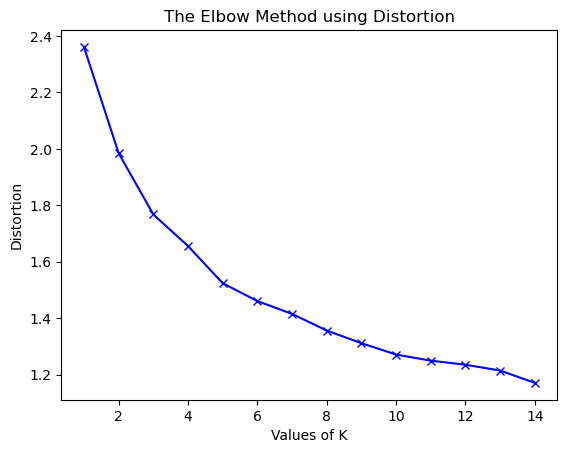

In [12]:
for key,val in mapping1.items():
    print(str(key)+' : '+str(val))

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

1 : 4515.0
2 : 3205.723708410711
3 : 2502.4897052596593
4 : 2154.163657347778
5 : 1880.8797891137028
6 : 1724.7849961190584
7 : 1593.5120398931385
8 : 1500.436577636288
9 : 1407.1211468658125
10 : 1336.6797652199332
11 : 1285.8743082034885
12 : 1241.0399472036247
13 : 1186.474515410615
14 : 1119.4627758895967


Text(0.5, 1.0, 'The Elbow Method using Inertia')

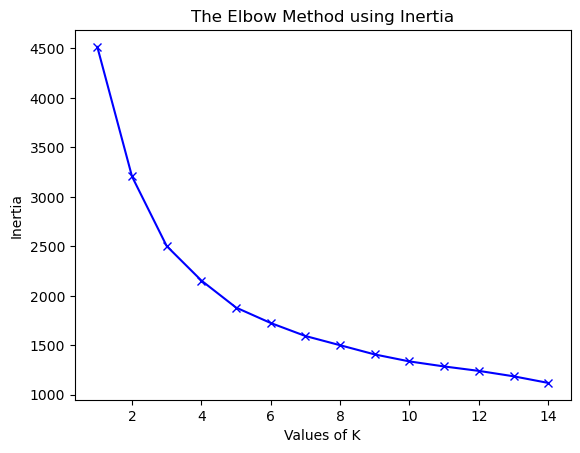

In [13]:
for key,val in mapping2.items():
    print(str(key)+' : '+str(val))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

## Q3) Storing cluster to which the house belongs along with the data 

In [14]:
kmeans = KMeans( n_clusters = 6, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [15]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
0    224
2    114
3    111
1     93
5     73
4     30
Name: count, dtype: int64

In [16]:
kmeans = KMeans( n_clusters = 8, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [17]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
7    131
6    114
5    111
0    101
2     82
1     61
4     31
3     14
Name: count, dtype: int64